In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     6
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     6
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     6
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     6
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     6

[214 rows x 10 columns]

array([<Axes: xlabel='Type'>, <Axes: xlabel='Type'>,
       <Axes: xlabel='Type'>, <Axes: xlabel='Type'>], dtype=object)

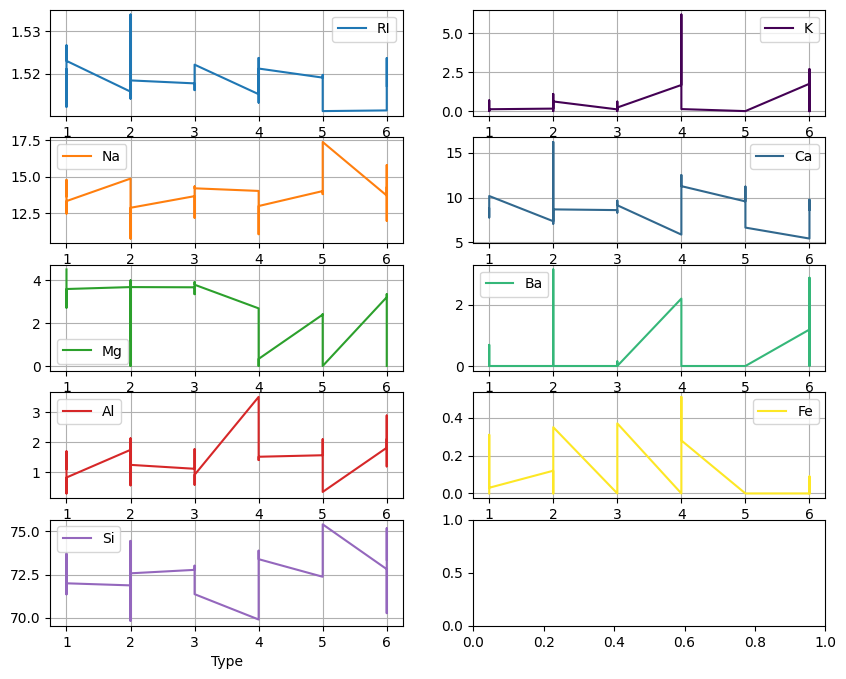

In [2]:
glass_df = pd.read_csv('./data/glass.csv').drop(columns=['Id'])
glass_df['Type'] = glass_df['Type'].map({1: 1, 2:2, 3:3, 5:4, 6:5, 7:6})
fig, axes = plt.subplots(5, 2, figsize=(10, 8))
display(glass_df)
glass_df.loc[:,['RI', 'Na', 'Mg', 'Al', 'Si', 'Type']].plot(x='Type', grid=True, subplots=True, ax=(axes[0][0], axes[1][0], axes[2][0], axes[3][0], axes[4][0]))
glass_df.loc[:,['K', 'Ca', 'Ba', 'Fe', 'Type']].plot(x='Type', grid=True, subplots=True, ax=(axes[0][1], axes[1][1], axes[2][1], axes[3][1]), colormap='viridis')

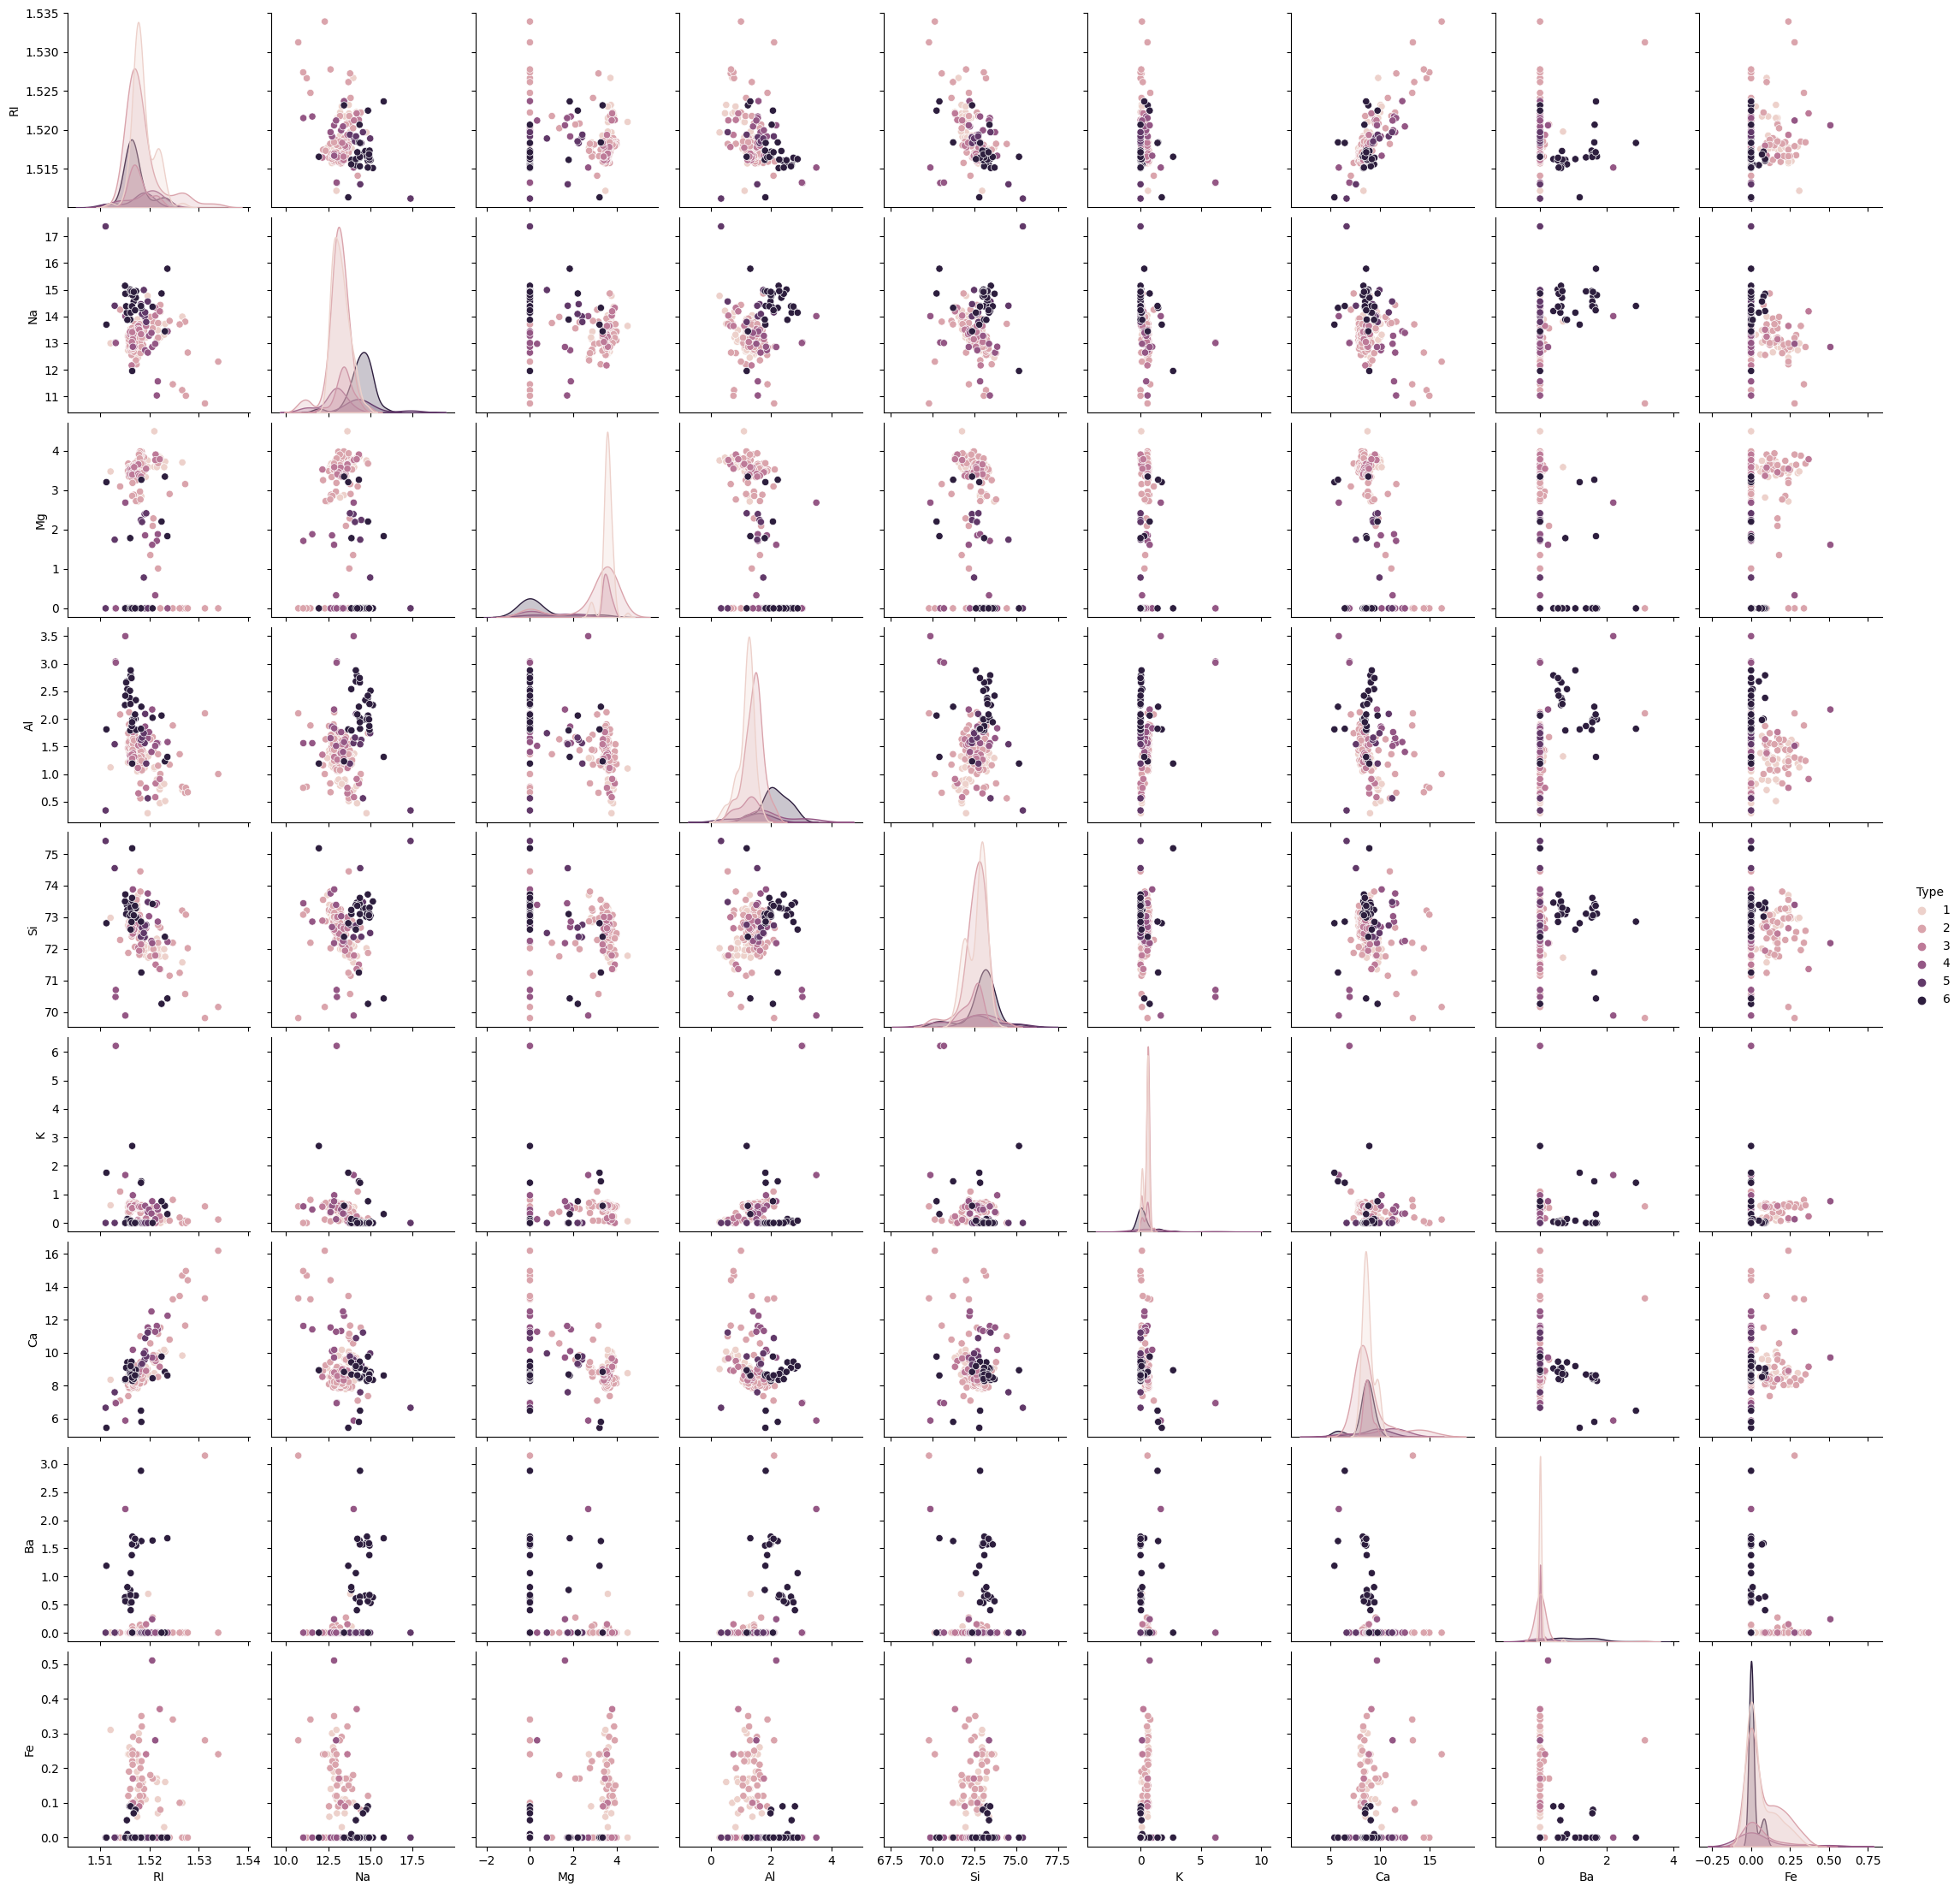

In [3]:
sns.pairplot(glass_df, hue='Type')

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
        glass_df.drop(columns=['Type']), 
        glass_df['Type'],
        train_size=0.75,
        test_size=0.25,
        random_state=0
    )

best:
k: 10, acc: 0.7407407407407407


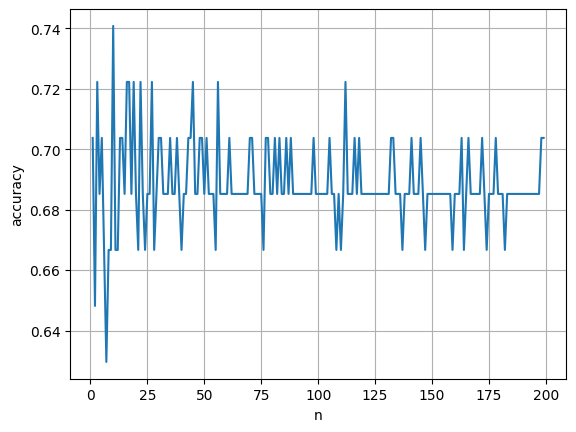

In [5]:
knn_test = pd.DataFrame(columns=['n', 'accuracy'])
for i in range(1, 200):
    bagging_classifier = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=2, metric='cosine'), n_estimators=i)
    bagging_classifier.fit(X=x_train, y=y_train)
    pred = bagging_classifier.predict(x_test)
    knn_test.loc[i] = {'n': i, 'accuracy': accuracy_score(y_test, pred)}
sns.lineplot(x='n', y='accuracy', data=knn_test, markers=True)
plt.grid()
print(f'best:\nk: {knn_test.accuracy.idxmax()}, acc: {knn_test.accuracy.max()}')

best:
k: 1, acc: 0.4444444444444444


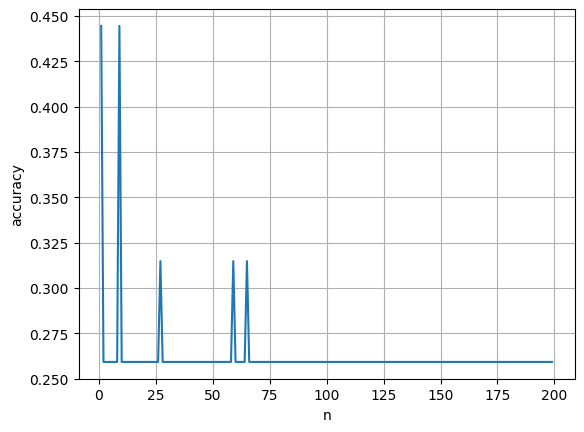

In [10]:
svc_test = pd.DataFrame(columns=['n', 'accuracy'])
for i in range(1, 200):
    bagging_classifier = BaggingClassifier(estimator=SVC(), n_estimators=i)
    bagging_classifier.fit(X=x_train, y=y_train)
    pred = bagging_classifier.predict(x_test)
    svc_test.loc[i] = {'n': i, 'accuracy': accuracy_score(y_test, pred)}
sns.lineplot(x='n', y='accuracy', data=svc_test, markers=True)
plt.grid()
print(f'best:\nk: {svc_test.accuracy.idxmax()}, acc: {svc_test.accuracy.max()}')

best:
k: 33, acc: 0.7407407407407407


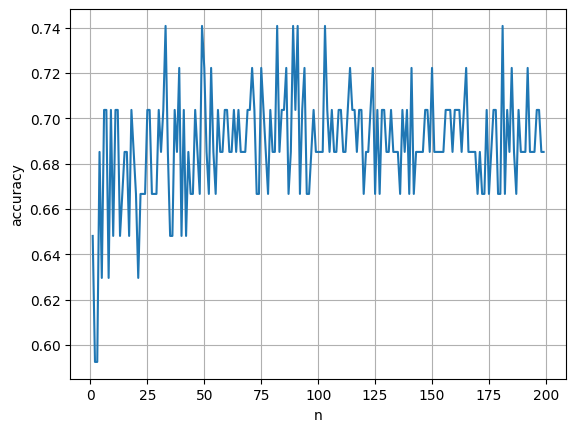

In [7]:
dec_tree_test = pd.DataFrame(columns=['n', 'accuracy'])
for i in range(1, 200):
    bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=i)
    bagging_classifier.fit(X=x_train, y=y_train)
    pred = bagging_classifier.predict(x_test)
    dec_tree_test.loc[i] = {'n': i, 'accuracy': accuracy_score(y_test, pred)}
sns.lineplot(x='n', y='accuracy', data=dec_tree_test, markers=True)
plt.grid()
print(f'best:\nk: {dec_tree_test.accuracy.idxmax()}, acc: {dec_tree_test.accuracy.max()}')